In [10]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pickle as pk
import scipy.sparse as sp

In [3]:
dataset = pk.load(open('../dataset/data/tmp/syn/syn90Seed10.pk','rb'))

In [5]:
dataset

Data(edge_index=[2, 312992], test_mask=[2500, 10], train_mask=[2500, 10], val_mask=[2500, 10], x=[2500, 1], y=[2500])

In [7]:
def data_set_analysis(data):
    row, col = data.edge_index
    size = data.x.shape[0]
    A = sp.coo_matrix((np.ones(len(row)), (row, col)), shape=(size, size), dtype=np.float32).tocsc()
    sorted_ind = np.argsort(data.y)
    plt.matshow(A[sorted_ind][:,sorted_ind].toarray())
    plt.title('Adjacency matrix')
    plt.show()
    num_clusters = int(data.y.max())+1
    print('number of clusters is {}'.format(num_clusters))

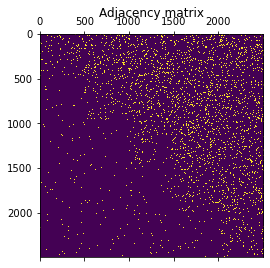

number of clusters is 5


In [11]:
data_set_analysis(dataset)

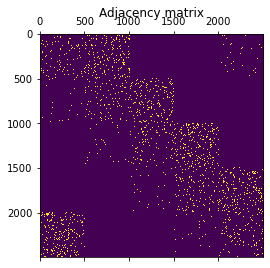

number of clusters is 5


In [12]:
dataset = pk.load(open('../dataset/data/tmp/syn/cyclic90Seed10.pk','rb'))
data_set_analysis(dataset)

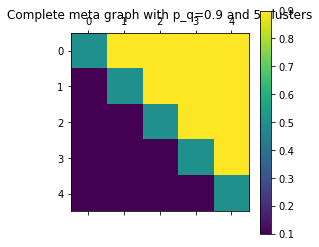

In [32]:
p_q = 0.9
num_clusters = 5
A = np.ones([num_clusters, num_clusters])*0.5
for i in range(num_clusters-1):
    for j in range(i+1, num_clusters):
        A[i,j] = p_q
        A[j,i] = 1-p_q
plt.matshow(A)
plt.colorbar()
plt.title('Complete meta graph with p_q={} and {} clusters'.format(p_q, num_clusters))
plt.show()

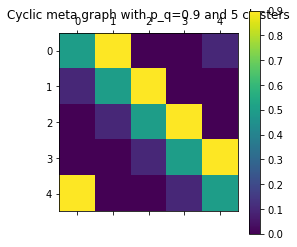

In [33]:
p_q = 0.9
num_clusters = 5
A = np.zeros([num_clusters, num_clusters])*0.5
for i in range(num_clusters):
    A[i,i] = 0.5
    A[i, (i+1)%num_clusters] = p_q
    A[i, (i-1)%num_clusters] = 1- p_q
plt.matshow(A)
plt.colorbar()
plt.title('Cyclic meta graph with p_q={} and {} clusters'.format(p_q, num_clusters))
plt.show()